In [1]:
from fastai import *
from fastai.vision import *

## **Get a list of URLs**

**Search and scroll**

Go to Google Images and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

"canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

**Download into file**

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

**Create directory and upload urls file into your server**

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

**Note:** You can download the urls locally and upload them to kaggle using:


Here, I have uploaded the urls for 
 - Teddy
 - Grizzly
 - Black 

In [2]:
classes = ['teddys','grizzly','black']

In [3]:
folder = 'black'
file = 'urls_black.txt'

In [4]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
!cp ../input/* {path}/

In [6]:
download_images(path/file, dest, max_pics=200)

In [7]:
folder = 'teddys'
file = 'urls_teddys.txt'

In [8]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [9]:
download_images(path/file, dest, max_pics=200)

In [10]:
folder = 'grizzly'
file = 'urls_grizzly.txt'

In [11]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [12]:
download_images(path/file, dest, max_pics=200)

Then we can remove any images that can't be opened:

In [13]:
for c in classes:
     print(c)
     verify_images(path/c, delete=True, max_size=500)

## View data

In [14]:
 np.random.seed(42)
 data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
         ds_tfms=get_transforms(), size=64, num_workers=0).normalize(imagenet_stats)

In [15]:
data.classes

['black', 'grizzly', 'teddys']

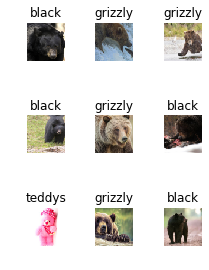

In [16]:
data.show_batch(rows=3, figsize=(3,4))

In [17]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:05<00:00, 15.5MB/s]


In [18]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.524923,0.546706,0.117647,00:04
1,0.999426,0.413018,0.068627,00:03
2,0.795221,0.421544,0.098039,00:03
3,0.669817,0.405668,0.127451,00:03


In [19]:
learn.save('stage-1')

In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


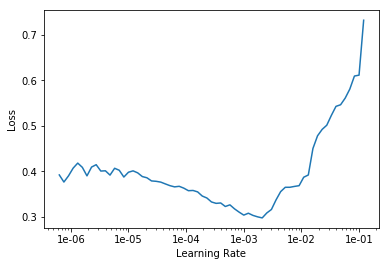

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.335899,0.417650,0.107843,00:03
1,0.277007,0.400303,0.147059,00:03


In [24]:
learn.save('stage-2')

## Interpretation

In [25]:
learn.load('stage-2');

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

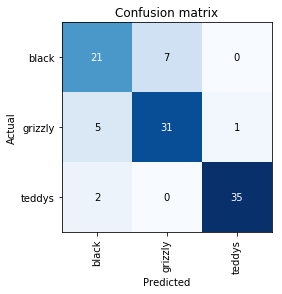

In [27]:
interp.plot_confusion_matrix()

In [30]:
learn = cnn_learner(data, models.resnet34).load('stage-2')

In [33]:
learn.export()

In [34]:
path.ls()

[PosixPath('data/bears/export.pkl'),
 PosixPath('data/bears/urls_black.txt'),
 PosixPath('data/bears/teddys'),
 PosixPath('data/bears/grizzly'),
 PosixPath('data/bears/models'),
 PosixPath('data/bears/urls_grizzly.txt'),
 PosixPath('data/bears/urls_teddys.txt'),
 PosixPath('data/bears/black')]

In [35]:
from IPython.display import FileLinks
FileLinks('.')

./
  __notebook_source__.ipynb
./data/bears/
  export.pkl
  urls_black.txt
  urls_grizzly.txt
  urls_teddys.txt
./data/bears/black/
  00000173.jpg
  00000054.jpg
  00000136.jpg
  00000100.jpg
  00000174.jpg
  00000046.jpg
  00000044.jpg
  00000188.jpg
  00000020.jpg
  00000124.jpg
  00000192.jpg
  00000132.jpg
  00000112.jpg
  00000155.jpg
  00000198.jpg
  00000115.jpg
  00000180.jpg
  00000167.jpg
  00000075.jpg
  00000120.jpg
  00000051.jpg
  00000176.jpg
  00000102.jpg
  00000000.jpg
  00000109.jpg
  00000038.jpg
  00000130.jpg
  00000076.jpg
  00000134.jpg
  00000146.jpg
  00000033.gif
  00000147.jpg
  00000070.jpg
  00000027.jpg
  00000086.jpg
  00000182.jpg
  00000163.jpg
  00000150.jpg
  00000082.jpg
  00000039.jpg
  00000064.jpg
  00000126.jpg
  00000009.jpg
  00000138.jpg
  00000052.jpeg
  00000139.jpg
  00000047.jpg
  00000066.jpg
  00000078.jpg
  00000158.jpg
  00000183.jpg
  00000034.jpg
  00000081.jpg
  00000095.jpg
  00000079.jpg
  00000048.jpg
  00000143.jpg
  00000022.jpg
  00000119.ashx
  00000016.jpg
  00000088.jpg
  00000049.jpg
  00000149.jpg
  00000063.jpg
  00000055.jpg
  00000187.jpg
  00000166.jpg
  00000118.jpg
  00000069.jpg
  00000156.jpg
  00000004.gif
  00000107.jpg
  00000172.jpg
  00000023.jpg
  00000008.jpg
  00000098.jpg
  00000059.jpg
  00000091.jpg
  00000181.jpg
  00000113.jpg
  00000121.jpg
  00000191.jpg
  00000080.jpg
  00000003.jpg
  00000085.jpg
  00000087.jpg
  00000067.jpg
  00000018.jpg
  00000040.jpg
  00000042.jpg
  00000195.jpg
  00000050.jpg
  00000074.jpg
  00000029.jpg
  00000194.jpg
  00000135.jpg
  00000105.jpg
  00000103.jpg
  00000104.jpg
  00000089.jpg
  00000122.jpg
  00000084.jpg
  00000162.jpg
  00000165.jpg
  00000007.jpg
  00000019.jpg
  00000116.JPG
  00000061.jpg
  00000127.jpg
  00000031.jpg
  00000161.jpg
  00000125.jpg
  00000073.JPG
  00000057.jpg
  00000168.jpg
  00000114.jpg
  00000128.jpg
  00000178.jpg
  00000096.png
  00000175.jpg
  00000171.jpg
  00000072.jpg
  00000036.jpg
  00000037.jpg
  00000185.jpg
  00000142.jpg
  00000137.jpg
  00000097.jpg
  00000083.jpg
  00000141.jpg
  00000090.jpg
  00000117.jpg
  00000164.jpg
  00000043.jpg
  00000148.jpg
  00000197.jpg
  00000145.jpg
  00000199.jpg
  00000002.jpg
  00000153.jpg
  00000184.jpeg
  00000030.jpg
  00000071.jpg
  00000092.jpg
  00000056.jpg
  00000160.jpg
  00000011.jpg
  00000060.jpg
  00000144.jpg
  00000133.jpg
  00000026.jpg
  00000159.jpg
  00000010.jpg
  00000152.jpg
  00000035.jpg
  00000024.jpg
  00000053.jpg
  00000108.jpg
  00000025.jpg
  00000157.jpg
  00000093.JPG
  00000013.jpg
  00000006.jpg
  00000190.jpg
  00000005.jpg
  00000014.jpg
  00000077.png
  00000111.jpg
  00000032.JPG
  00000099.jpg
  00000123.jpg
  00000068.jpg
./data/bears/grizzly/
  00000065.jpg
  00000173.jpg
  00000021.jpg
  00000054.jpg
  00000136.jpg
  00000100.jpg
  00000044.jpg
  00000116.jpg
  00000188.jpg
  00000020.jpg
  00000124.jpg
  00000192.jpg
  00000112.jpg
  00000155.jpg
  00000198.jpg
  00000115.jpg
  00000180.jpg
  00000167.jpg
  00000075.jpg
  00000120.jpg
  00000051.jpg
  00000176.jpg
  00000102.jpg
  00000000.jpg
  00000038.jpg
  00000130.jpg
  00000186.jpg
  00000015.jpg
  00000076.jpg
  00000134.jpg
  00000146.jpg
  00000147.jpg
  00000052.jpg
  00000070.jpg
  00000086.jpg
  00000182.jpg
  00000163.jpg
  00000150.jpg
  00000082.jpg
  00000039.jpg
  00000064.jpg
  00000126.jpg
  00000009.jpg
  00000129.aspx
  00000073.jpg
  00000081.jpeg
  00000041.jpg
  00000138.jpg
  00000047.jpg
  00000174.JPG
  00000066.jpg
  00000078.jpg
  00000158.jpg
  00000034.jpg
  00000079.jpg
  00000010.ashx
  00000143.jpg
  00000022.jpg
  00000035.jpeg
  00000121.JPG
  00000016.jpg
  00000049.jpg
  00000149.jpg
  00000063.jpg
  00000119.jpg
  00000187.jpg
  00000166.jpg
  00000118.jpg
  00000069.jpg
  00000156.jpg
  00000032.jpg
  00000107.jpg
  00000172.jpg
  00000193.jpg
  00000018.img
  00000023.jpg
  00000008.jpg
  00000151.jpg
  00000098.jpg
  00000059.jpg
  00000091.jpg
  00000140.jpg
  00000181.jpg
  00000123.jpe